In [77]:
import pandas as pd
import os
from IPython.display import Markdown
import matplotlib.pyplot as plt


In [27]:
os.chdir("D:\Stackerbee\Timeseries\Csv_Data_set")

# Displying head of MLTempDataset.csv

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


# Displying Datatypes

Unnamed: 0             int64
Datetime1              int64
DAYTON_MW            float64
Datetime      datetime64[ns]
dtype: object

# Displying Null values in the data set

Unnamed: 0    0
Datetime1     0
DAYTON_MW     0
Datetime      0
dtype: int64

# Displying head of MLTempDataset1.csv

,Unnamed: 0,Datetime,Hourly_Temp,Date
0,0,2022-01-04 00:00:00,20.867,2022-01-04
1,1,2022-01-04 01:00:00,21.000,2022-01-04
2,2,2022-01-04 02:00:00,20.867,2022-01-04
3,3,2022-01-04 03:00:00,20.650,2022-01-04
4,4,2022-01-04 04:00:00,20.400,2022-01-04


# Displying Datatypes

Unnamed: 0              int64
Datetime       datetime64[ns]
Hourly_Temp           float64
Date                   object
dtype: object

# Displying Null values in the data set

Unnamed: 0    0
Datetime1     0
DAYTON_MW     0
Datetime      0
dtype: int64

# Mean_temp_of_all_data

,Unnamed: 0,Datetime,Hourly_Temp
count,7056.000000,7056,7056.000000
mean,3527.500000,2022-05-30 23:29:59.999999744,21.867468
min,0.000000,2022-01-04 00:00:00,5.350000
25%,1763.750000,2022-03-18 11:45:00,18.400000
50%,3527.500000,2022-05-30 23:30:00,24.033000
75%,5291.250000,2022-08-12 11:15:00,26.333000
max,7055.000000,2022-10-24 23:00:00,36.500000
std,2037.036082,NaN,6.737313


# Mean_temp_of_data_per_date

,Hourly_Temp
count,294.000000
mean,21.867468
std,5.031718
min,8.202833
25%,19.013760
50%,22.591396
75%,25.451635
max,31.541625


Index([], dtype='int64')

,Unnamed: 0,Datetime,Hourly_Temp,Date
0,0,2022-01-04 00:00:00,20.867,2022-01-04
1,1,2022-01-04 01:00:00,21.000,2022-01-04
2,2,2022-01-04 02:00:00,20.867,2022-01-04
3,3,2022-01-04 03:00:00,20.650,2022-01-04
4,4,2022-01-04 04:00:00,20.400,2022-01-04
...,...,...,...,...
7051,7051,2022-10-24 19:00:00,25.567,2022-10-24
7052,7052,2022-10-24 20:00:00,25.183,2022-10-24
7053,7053,2022-10-24 21:00:00,24.600,2022-10-24
7054,7054,2022-10-24 22:00:00,23.986,2022-10-24


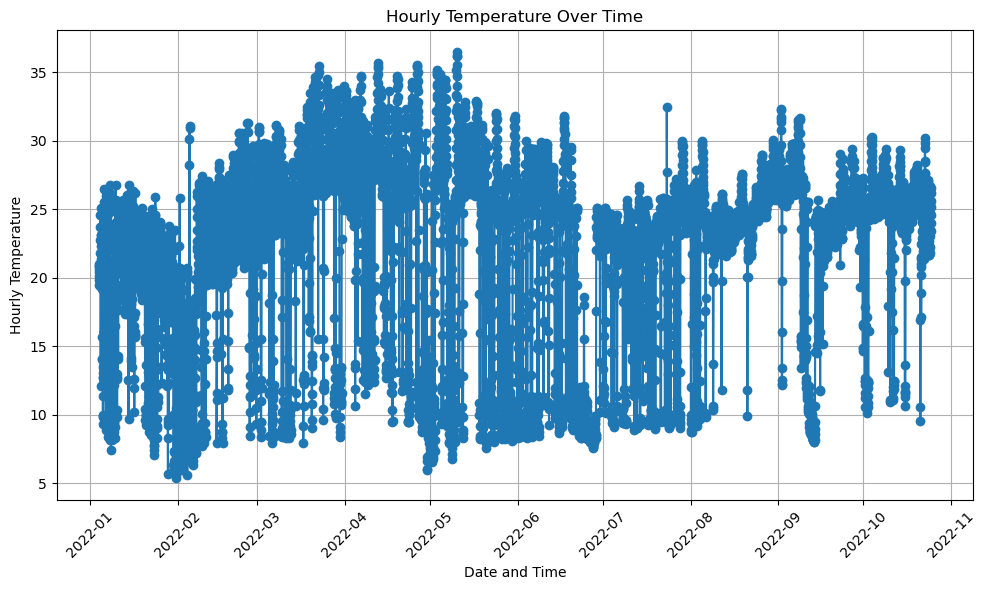

Test The datas
      Unnamed: 0            Datetime  Hourly_Temp        Date    Month
0              0 2022-01-04 00:00:00       20.867  2022-01-04  2022-01
1              1 2022-01-04 01:00:00       21.000  2022-01-04  2022-01
2              2 2022-01-04 02:00:00       20.867  2022-01-04  2022-01
3              3 2022-01-04 03:00:00       20.650  2022-01-04  2022-01
4              4 2022-01-04 04:00:00       20.400  2022-01-04  2022-01
...          ...                 ...          ...         ...      ...
7051        7051 2022-10-24 19:00:00       25.567  2022-10-24  2022-10
7052        7052 2022-10-24 20:00:00       25.183  2022-10-24  2022-10
7053        7053 2022-10-24 21:00:00       24.600  2022-10-24  2022-10
7054        7054 2022-10-24 22:00:00       23.986  2022-10-24  2022-10
7055        7055 2022-10-24 23:00:00       23.383  2022-10-24  2022-10

[7056 rows x 5 columns]


TypeError: float() argument must be a string or a real number, not 'Period'

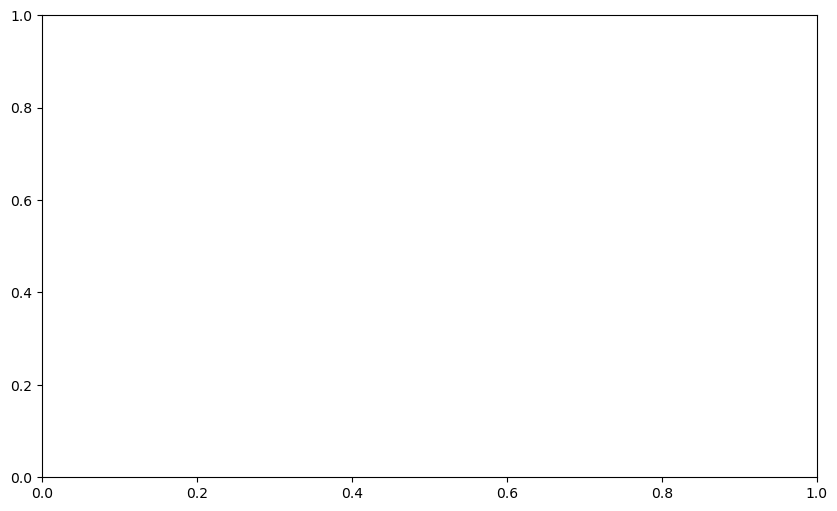

In [93]:
class Timeseries:
    def __init__(self,path,path1):
        self.data_set = pd.read_csv(path)
        self.data_set_1 = pd.read_csv(path1)
    def display(self):
        display(Markdown('# Displying head of MLTempDataset.csv'))
        display(self.data_set.head())
        self.data_set['Datetime'] = pd.to_datetime(self.data_set['Datetime'])
        print("\n")
        display(Markdown('# Displying Datatypes'))
        display(self.data_set.dtypes)
        print("\n\n")
        display(Markdown('# Displying Null values in the data set'))
        display(self.data_set.isnull().sum())
        display(Markdown('# Displying head of MLTempDataset1.csv'))
        self.data_set_1['Datetime'] = pd.to_datetime(self.data_set_1['Datetime'])
        self.data_set_1['Date'] = self.data_set_1['Datetime'].dt.date
        display(self.data_set_1.head())
        print("\n")
        display(Markdown('# Displying Datatypes'))
        display(self.data_set_1.dtypes)
        display(Markdown('# Displying Null values in the data set'))
        display(self.data_set.isnull().sum())
        
        mean_temp_per_date = self.data_set_1.groupby('Date')['Hourly_Temp'].mean().reset_index()

        self.data_set_1.drop(columns=['Unnamed: 0','Datetime','Date'])
        mean_temp_of_all_data = self.data_set_1.describe()

        display(Markdown('# Mean_temp_of_all_data'))
        display(mean_temp_of_all_data)

        display(Markdown('# Mean_temp_of_data_per_date'))
        display(mean_temp_per_date.describe())

    def Finding_outliers(self):

        z_scores = stats.zscore(self.data_set_1['Hourly_Temp'])
        outlier_indices = self.data_set_1.index[abs(z_scores) > 3]
        display(outlier_indices)

    def Data_Visualize(self):
        display(self.data_set_1)

        # Convert 'Datetime' column to datetime type
        self.data_set_1['Datetime'] = pd.to_datetime(self.data_set_1['Datetime'])
        
        # Plot Hourly_Temp values over time (without preprocessing)
        plt.figure(figsize=(10, 6))
        plt.plot(self.data_set_1['Datetime'], self.data_set_1['Hourly_Temp'], marker='o', linestyle='-')
        plt.title('Hourly Temperature Over Time')
        plt.xlabel('Date and Time')
        plt.ylabel('Hourly Temperature')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        self.data_set_1['Month'] = self.data_set_1['Datetime'].dt.to_period('M')
        monthly_mean_temp['Month'] = monthly_mean_temp['Month'].astype(str)

        print("Test The datas")
        print(self.data_set_1)
        monthly_mean_temp = self.data_set_1.groupby('Month')['Hourly_Temp'].mean().reset_index()
        # print(monthly_mean_temp)
        
        plt.figure(figsize=(10, 6))
        plt.plot(monthly_mean_temp['Month'], monthly_mean_temp['Hourly_Temp'], marker='o', linestyle='-')
        plt.title('Mean Monthly Temperature')
        plt.xlabel('Month')
        plt.ylabel('Mean Temperature')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        
                

    

Timeseries_Analysis = Timeseries('MLTempDataset.csv','MLTempDataset1.csv')
Timeseries_Analysis.display()
Timeseries_Analysis.Finding_outliers()
Timeseries_Analysis.Data_Visualize()

        